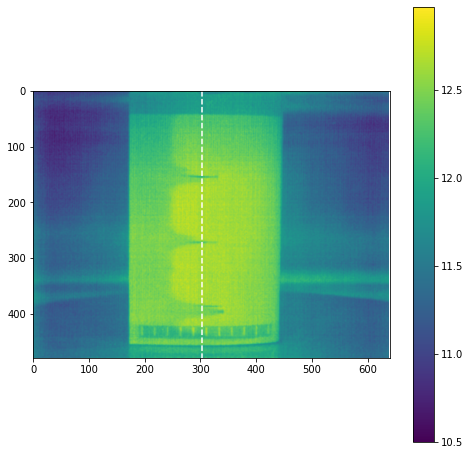

count    307200.000000
mean         11.781606
std           0.568472
min          10.500000
25%          11.309091
50%          11.618182
75%          12.381818
max          12.972727
dtype: float64


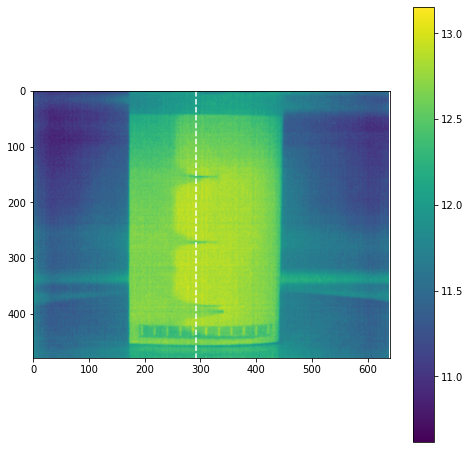

count    307200.000000
mean         11.927775
std           0.609597
min          10.618182
25%          11.418182
50%          11.736364
75%          12.581818
max          13.154545
dtype: float64


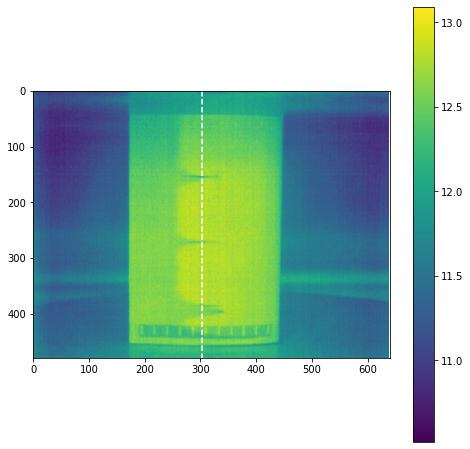

count    307200.000000
mean         11.836874
std           0.625917
min          10.518182
25%          11.318182
50%          11.636364
75%          12.509091
max          13.090909
dtype: float64


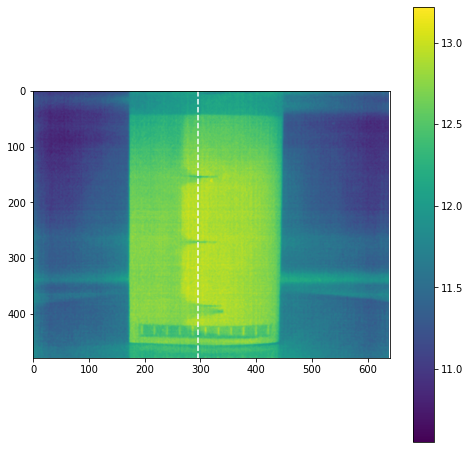

count    307200.000000
mean         11.910620
std           0.655154
min          10.554545
25%          11.363636
50%          11.700000
75%          12.618182
max          13.218182
dtype: float64


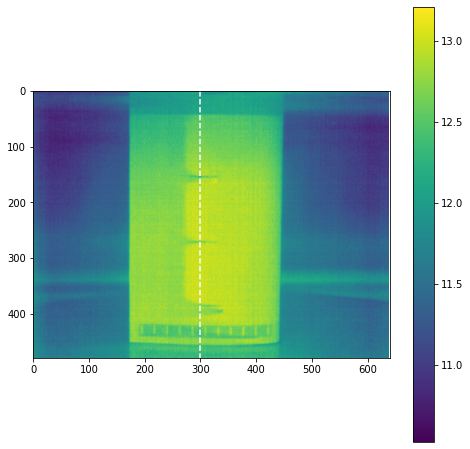

count    307200.000000
mean         11.915723
std           0.684781
min          10.527273
25%          11.345455
50%          11.709091
75%          12.645455
max          13.209091
dtype: float64


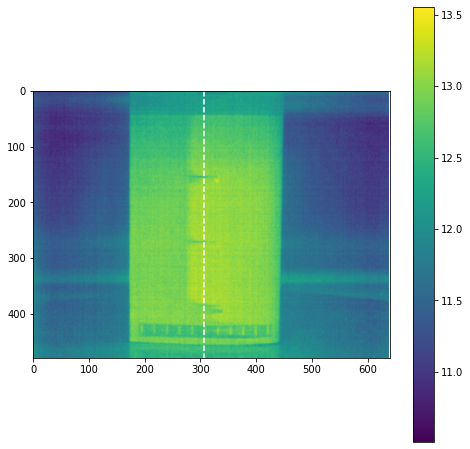

count    307200.000000
mean         12.025721
std           0.723667
min          10.509091
25%          11.400000
50%          11.809091
75%          12.790909
max          13.554545
dtype: float64


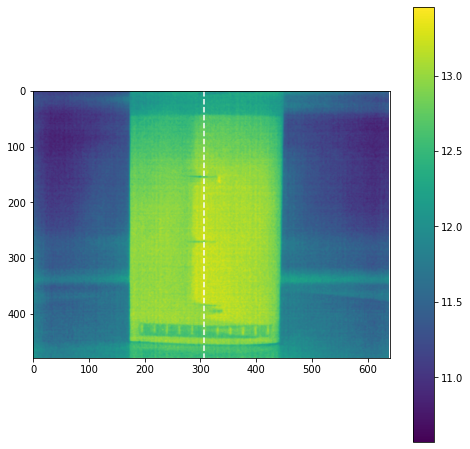

count    307200.000000
mean         12.031422
std           0.752463
min          10.572727
25%          11.381818
50%          11.800000
75%          12.845455
max          13.454545
dtype: float64


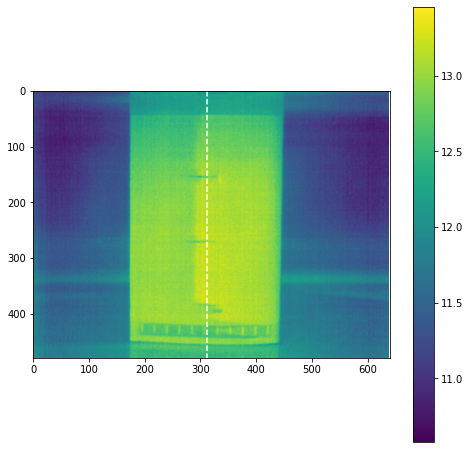

count    307200.000000
mean         12.007803
std           0.769062
min          10.581818
25%          11.336364
50%          11.772727
75%          12.845455
max          13.454545
dtype: float64


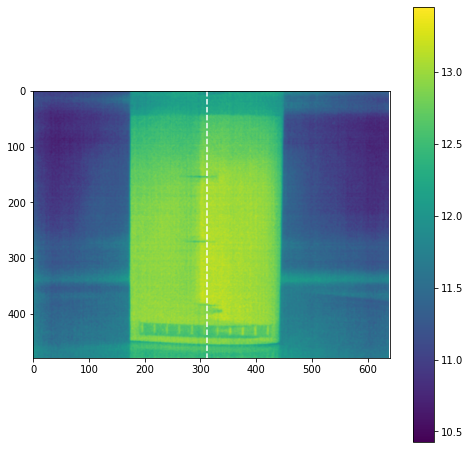

count    307200.000000
mean         11.928419
std           0.782383
min          10.427273
25%          11.254545
50%          11.690909
75%          12.772727
max          13.454545
dtype: float64


In [ ]:
import os
import pandas as pd
import numpy as np

%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


from numpy import genfromtxt 

AOAlist = [-3,-2,-1,0,1,2,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,11,11.5,12,12.5,13,13.5,14,15,16,17]
# AOAlist = [14,15,16,17]
for AOA in AOAlist:
    folderName = f"alpha {AOA}"

    data = []
    for filename in os.listdir(folderName):
        if filename.endswith(".csv"):
            df=pd.read_csv(f'{folderName}/{filename}', sep=';',header=None)
            df = df.astype(str).replace(",",".",regex=True).astype(float)
            data.append(df)

    image = sum(data)/len(data)
    
    # Gets change in boundry layer
    
# Works ok to high AOA and good definition
#     boundryX = image.iloc[200:300,180:430].diff(axis=1).abs().sum().idxmax()
    
    intensitySum = image.iloc[200:300,180:435].sum()#.diff().idxmax()#.diff(axis=1).idxmax() #.describe()
    intensityMax =  intensitySum.quantile(0.95)
    
    idx = intensitySum[intensitySum>=intensityMax].index.values
    boundryX = np.average(idx)
  
    
    row , _ = image.shape
    boundryY = np.linspace(0,row-1,100)
    
    figure(figsize=(8, 8))
    plt.imshow(image, interpolation="bicubic",  vmin=0, vmax=12)
    plt.imshow(image, interpolation="bicubic")
    plt.colorbar()
    plt.plot([boundryX]*100,boundryY,'w--')
    plt.savefig(f"{AOA}_AOA.png")
    plt.show()
  
    print(pd.Series(np.concatenate( image.values, axis=0 )).describe())

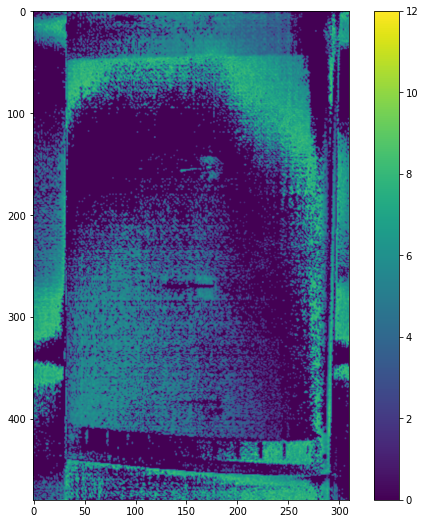

In [267]:

imageEdit = image.iloc[:,150:460].copy()
pixelMax = imageEdit.quantile(0.5)
imageEdit[imageEdit<=pixelMax] = 0

figure(figsize=(9, 9))
plt.imshow(imageEdit, interpolation='bicubic', vmin=0, vmax=12)
plt.colorbar()
plt.show()

# pd.Series(df.values).describe()
# pd.Series(np.concatenate( image.values, axis=0 )).describe()

In [246]:
# image.iloc[200:400,180:300].diff(axis=1).abs().sum().describe() #.idxmax()
# sumvertical =image.iloc[200:400,180:300].sum(axis=1)
# sumvertical
# percet75 = sumvertical.quantile(0.75)
# sumvertical[sumvertical>=percet75]
#.diff(axis=1).abs().sum().describe() #.idxmax()



# best = image.iloc[200:400,180:445].diff(axis=1).abs().sum() #.idxmax()
# percent75 = best.quantile(0.95)
# percet75

# a = image.iloc[200:400,180:445].diff(axis=1).abs().sum()
# quant = a.quantile(0.95)
# a[a>=quant].idxmin()
# quant
# image.iloc[200:400,250:300].diff(axis=1).abs().sum().idxmax()
# datas = image.iloc[200:300,180:430].sum()#.diff().idxmax()#.diff(axis=1).idxmax() #.describe()
# quantis =  datas.quantile(0.9)
# idx = datas[datas>=quantis].index.values
# np.average(idx)
# quantis

intensitySum.describe()


count    255.000000
mean     518.476453
std      172.150096
min      141.799091
25%      378.590909
50%      600.272727
75%      651.546818
max      732.002727
dtype: float64